In [3]:
from tvtk.api import tvtk
from tvtk.common import configure_input
from tvtkfunc import ivtk_scene, event_loop

plot3d = tvtk.MultiBlockPLOT3DReader(
    xyz_file_name="combxyz.bin",
    q_file_name="combq.bin",
    scalar_function_number=100, vector_function_number=200
)  # 读入Plot3D数据
plot3d.update()  # 让plot3D计算其输出数据
grid = plot3d.output.get_block(0)  # 获取读入的数据集对象

outline = tvtk.StructuredGridOutlineFilter()  # 计算表示外边框的PolyData对象
configure_input(outline, grid)  # 调用tvtk.common.configure_input()
m = tvtk.PolyDataMapper(input_connection=outline.output_port)
a = tvtk.Actor(mapper=m)
a.property.color = 0.3, 0.3, 0.3

# 窗口绘制
win = ivtk_scene(a)
win.scene.isometric_view()
event_loop()

ModuleNotFoundError: No module named 'tvtk'

In [2]:
!pip install C:\TDDownload\mayavi-4.6.1+vtk81-cp36-cp36m-win_amd64.whl
!pip install C:\TDDownload\numpy-1.15.0+mkl-cp36-cp36m-win_amd64.whl
!pip install C:\TDDownload\PyQt4-4.11.4-cp36-cp36m-win_amd64.whl
!pip install C:\TDDownload\traits-4.6.0-cp36-cp36m-win_amd64.whl
!pip install C:\TDDownload\VTK-8.1.1-cp36-cp36m-win_amd64.whl

Processing c:\tddownload\mayavi-4.6.1+vtk81-cp36-cp36m-win_amd64.whl
  Running setup.py bdist_wheel for traitsui: started
  Running setup.py bdist_wheel for traitsui: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\1f\e4\16\861bd3f165b0f373f6a508ca6e866a73b5fc27f77cbaf71314
  Running setup.py bdist_wheel for envisage: started
  Running setup.py bdist_wheel for envisage: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\ef\11\9f\aa801320a7934eb26647813f1d9e21e0eda8aee17ee55ee361
  Running setup.py bdist_wheel for apptools: started
  Running setup.py bdist_wheel for apptools: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\f9\9e\2a\981bab2267d8f7fa546568cd79440e6b61b4fc570ee071080e
  Running setup.py bdist_wheel for pyface: started
  Running setup.py bdist_wheel for pyface: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cach

  Failed building wheel for traits
Command "c:\users\d\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\d\\AppData\\Local\\Temp\\pip-install-1qz6_6y1\\traits\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\d\AppData\Local\Temp\pip-record-ez5bszn8\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\d\AppData\Local\Temp\pip-install-1qz6_6y1\traits\


Processing c:\tddownload\numpy-1.15.0+mkl-cp36-cp36m-win_amd64.whl
  Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5


Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'C:\\Users\\d\\AppData\\Local\\Temp\\pip-uninstall-mvrvme5w\\users\\d\\anaconda3\\lib\\site-packages\\numpy\\.libs\\libopenblas.bnvrk7633hsx7yvo2tadgr4a5kekxjaw.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



Processing c:\tddownload\pyqt4-4.11.4-cp36-cp36m-win_amd64.whl


Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'c:\\users\\d\\anaconda3\\Lib\\site-packages\\sip.pyd'
Consider using the `--user` option or check the permissions.



Processing c:\tddownload\traits-4.6.0-cp36-cp36m-win_amd64.whl
Processing c:\tddownload\vtk-8.1.1-cp36-cp36m-win_amd64.whl


In [6]:
!pip install tvtk

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/tvtk/
  Could not find a version that satisfies the requirement tvtk (from versions: )
No matching distribution found for tvtk


time= 0.192535478983757
time= 0.32531242346755107
time= 0.36258798648268
time= 0.3923476528432417
time= 0.630819851979993
time= 0.8031697229279331


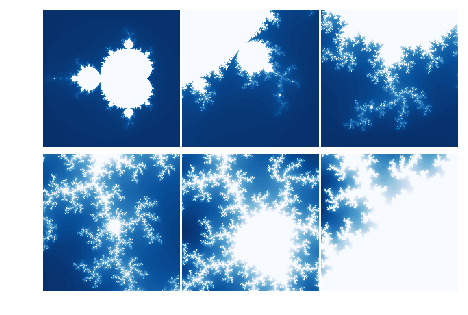

In [7]:
import numpy as np
import pylab as pl
import time
from matplotlib import cm

def iter_point(c):
    z = c
    for i in range(1, 100): # 最多迭代100次
        if abs(z)>2: break # 半径大于2则认为逃逸
        z = z*z+c
    return i # 返回迭代次数
    
def draw_mandelbrot(cx, cy, d):
    """
    绘制点(cx, cy)附近正负d的范围的Mandelbrot
    """
    x0, x1, y0, y1 = cx-d, cx+d, cy-d, cy+d 
    y, x = np.ogrid[y0:y1:200j, x0:x1:200j]
    c = x + y*1j
    start = time.clock()
    mandelbrot = np.frompyfunc(iter_point,1,1)(c).astype(np.float)
    print ("time=",time.clock() - start)
    pl.imshow(mandelbrot, cmap=cm.Blues_r, extent=[x0,x1,y0,y1])
    pl.gca().set_axis_off()
    
x,y = 0.27322626, 0.595153338

pl.subplot(231)
draw_mandelbrot(-0.5,0,1.5)
for i in range(2,7):    
    pl.subplot(230+i)
    draw_mandelbrot(x, y, 0.2**(i-1))
pl.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
pl.show()

In [3]:
%%writefile aa.py
import random
from urllib import urlopen
import sys

WORD_URL = "http://learncodethehardway.org/words.txt"
WORDS = []

PHRASES = {
    "class %%%(%%%):":
      "Make a class named %%% that is-a %%%.",
    "class %%%(object):\n\tdef __init__(self, ***)" :
      "class %%% has-a __init__ that takes self and *** parameters.",
    "class %%%(object):\n\tdef ***(self, @@@)":
      "class %%% has-a function named *** that takes self and @@@ parameters.",
    "*** = %%%()":
      "Set *** to an instance of class %%%.",
    "***.***(@@@)":
      "From *** get the *** function, and call it with parameters self, @@@.",
    "***.*** = '***'":
      "From *** get the *** attribute and set it to '***'."
}


# do they want to drill phrases first
if len(sys.argv) == 2 and sys.argv[1] == "english":
    PHRASE_FIRST = True
else:
    PHRASE_FIRST = False

# load up the words from the website
for word in urlopen(WORD_URL).readlines():
    WORDS.append(word.strip())


def convert(snippet, phrase):
    class_names = [w.capitalize() for w in
                   random.sample(WORDS, snippet.count("%%%"))]
    other_names = random.sample(WORDS, snippet.count("***"))
    results = []
    param_names = []

    for i in range(0, snippet.count("@@@")):
        param_count = random.randint(1,3)
        param_names.append(', '.join(random.sample(WORDS, param_count)))

    for sentence in snippet, phrase:
        result = sentence[:]

        # fake class names
        for word in class_names:
            result = result.replace("%%%", word, 1)

        # fake other names
        for word in other_names:
            result = result.replace("***", word, 1)

        # fake parameter lists
        for word in param_names:
            result = result.replace("@@@", word, 1)

        results.append(result)

    return results


# keep going until they hit CTRL-D
try:
    while True:
        snippets = PHRASES.keys()
        random.shuffle(snippets)

        for snippet in snippets:
            phrase = PHRASES[snippet]
            question, answer = convert(snippet, phrase)
            if PHRASE_FIRST:
                question, answer = answer, question

            print question

            tmp=raw_input("> ")
            if tmp ==  answer:
                print "right"
            else:
                print tmp
                print answer,'\n\n'
#                 print "ANSWER:  %s\n\n" % answer
except EOFError:
    print "\nBye"

Overwriting aa.py


In [19]:
# %run aa.py english

In [1]:
## Animal is-a object (yes, sort of confusing) look at the extra credit
class Animal(object):
    pass

## do is-a animal
class Dog(Animal):

    def __init__(self, name):
        ## ??
        self.name = name

## ??
class Cat(Animal):

    def __init__(self, name):
        ## ??
        self.name = name

## ??
class Person(object):

    def __init__(self, name):
        ## ??
        self.name = name

        ## Person has-a pet of some kind
        self.pet = None

## ??
class Employee(Person):

    def __init__(self, name, salary):
        ## ?? hmm what is this strange magic?
        super(Employee, self).__init__(name)
        ## ??
        self.salary = salary

## ??
class Fish(object):
    pass

## ??
class Salmon(Fish):
    pass

## ??
class Halibut(Fish):
    pass


## rover is-a Dog
rover = Dog("Rover")

## ??
satan = Cat("Satan")

## ??
mary = Person("Mary")

## ??
mary.pet = satan

## ??
frank = Employee("Frank", 120000)

## ??
frank.pet = rover

## ??
flipper = Fish()

## ??
crouse = Salmon()

## ??
harry = Halibut()

In [4]:
class Parent(object):

    def altered(self):
        print "PARENT altered()"

class Child(Parent):

    def altered(self):
        print "CHILD, BEFORE PARENT altered()"
        super(Child, self).altered()
        print "CHILD, AFTER PARENT altered()"

dad = Parent()
son = Child()


son.altered()

CHILD, BEFORE PARENT altered()
PARENT altered()
CHILD, AFTER PARENT altered()


In [7]:
lst=list(range(4))
a=lst.pop(1)
b=lst,a,3,4
b
b=lst
b
b[1]=22
b


[0, 22, 3]